# **Asteroid diameter Prediction**
Emanuel Shakrov, Sariel Tutay, Gilad Battat
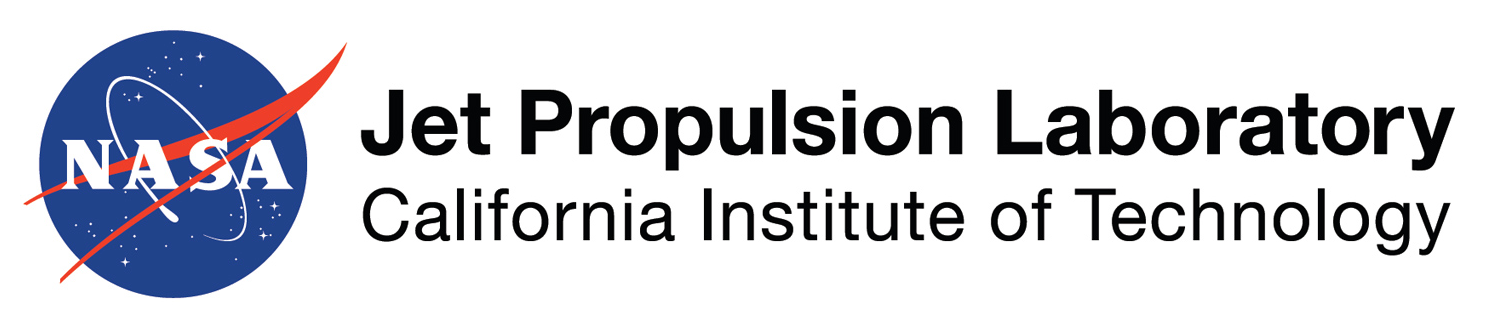
This data is provided with the information about the various asteroids and their orbital velocities, diameters and magnitudes and many other features.
The dataset has been taken from [Kaggle](https://www.kaggle.com/datasets/basu369victor/prediction-of-asteroid-diameter?select=Asteroid_Updated.csv) which has been taken from the official website of Jet Propulsion Laboratory of California Institute of Technology which is an organization under NASA, and maintained by them.
The last update of this data was 3 years ago.

**Column description**:
* **Albedo** refers to an object's measure of reflectivity, or intrinsic brightness. A white, perfectly reflecting surface has an albedo of 1.0; a black, perfectly absorbing surface has an albedo of 0.0.

* **Geometric Albedo**: Geometric albedo is the ratio of a body's brightness at zero phase angle to the brightness of a perfectly diffusing disk with the same position and apparent size as the body.

* **Eccentricity**: the smaller the eccentricity number, the more circular the realm.

* **Absolute Magnitude parameter** An asteroid’s absolute magnitude is the visual magnitude an observer would record if the asteroid were placed 1 Astronomical Unit (AU) away, and 1 AU from the Sun and at a zero phase angle.

* **PHA**: This feature denotes whether the asteroid is hazardous or not.

* **moid**(Minimum orbit intersection distance): A large MOID between and asteroid and the Earth indicates the asteroid will not collide with Earth in the near term. Asteroids with a small MOID to Earth should be carefully followed because they can become Earth colliders.

* **q**: the point in the orbit of an asteroid least distant from the Sun.(Perihelion dist)
* **n**: the angular speed required for a body to complete one orbit




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 💾 Data processing


### Reading the Asteroid Dataset

In [3]:
# TODO change that
import os

if os.path.exists('Asteroid_Updated.csv'):
    df = pd.read_csv('Asteroid_Updated.csv',  on_bad_lines='skip')
elif os.path.exists('/content/drive/My Drive/Data/Asteroid_Updated.csv'):
    df = pd.read_csv('/content/drive/My Drive/Data/Asteroid_Updated.csv',  on_bad_lines='skip')
elif os.path.exists('/content/drive//MyDrive/Asteroid_Updated.csv'):
    df = pd.read_csv('/content/drive//MyDrive/Asteroid_Updated.csv',  on_bad_lines='skip')
else:
    raise Exception("Could not find the dataset")

In [4]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [5]:
def rename_colums(df):
  return df.rename(columns={"a": "semi-major axis",
                                          "e": "Eccentricity",
                                          "G": "Magnitude slope parameter",
                                          "i": "Inclination with ecliptic plane",
                                          "om": "Longitude of the ascending node",
                                          "w": "Argument of perihelion",
                                          "q": "Perihelion distance(au)",
                                          "ad": "Aphelion distance(au)",
                                          "per_y": "Orbital period",
                                          "data_arc": "Data arc-span(d)",
                                          "condition_code": "Orbit condition code",
                                          "n_obs_used": "number of observations used",
                                          "H": "Absolute Magnitude parameter",
                                          "n": "Mean motion(deg/d)",
                                          "per": "Orbital Period(d)",
                                          "ma": "Mean anomaly(deg)",
                                          "moid": "Min orbit Intersection dist"
                                          })
readable_df = rename_colums(df)

Full name column is not useful for the model's prediction ability.

In [6]:
readable_df

,name,semi-major axis,Eccentricity,Inclination with ecliptic plane,Longitude of the ascending node,Argument of perihelion,Perihelion distance(au),Aphelion distance(au),Orbital period,Data arc-span(d),...,UB,IR,spec_B,spec_T,Magnitude slope parameter,Min orbit Intersection dist,class,Mean motion(deg/d),Orbital Period(d),Mean anomaly(deg)
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,...,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,...,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,...,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,...,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


In [7]:
readable_df = readable_df.drop(['name'], axis=1)
readable_df.head()

,semi-major axis,Eccentricity,Inclination with ecliptic plane,Longitude of the ascending node,Argument of perihelion,Perihelion distance(au),Aphelion distance(au),Orbital period,Data arc-span(d),Orbit condition code,...,UB,IR,spec_B,spec_T,Magnitude slope parameter,Min orbit Intersection dist,class,Mean motion(deg/d),Orbital Period(d),Mean anomaly(deg)
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [8]:
readable_df.shape

(839714, 30)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def Diff(li1, li2):
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2]
    return li_dif

def prepare_data_to_model(df):
  # Split to train and test
  y = df['diameter']
  X = df.drop('diameter', axis=1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

  # Handle categorical data
  X_train = handle_categorical_data(X_train)
  X_test = handle_categorical_data(X_test)

  # Handle with missing classes in test
  columns_diff = Diff(X_train.columns.to_list(),X_test.columns.to_list() )
  for i, key in enumerate(columns_diff):
    X_test[columns_diff[i]] = 0

  # Normalize the data
  scaler = StandardScaler()
  normalized_x_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns)

  normalized_x_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns)
  
  return X_train, X_test, y_train, y_test

# 📈 Exploratory Data Analysis (EDA)



### Handling missing values 

Text(0.5, 1.0, 'Missing values')

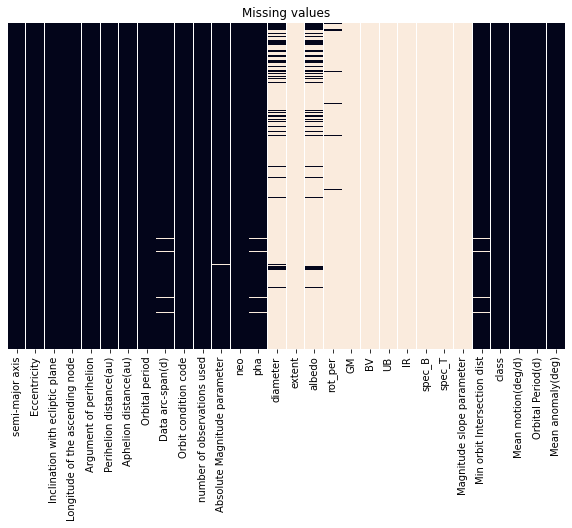

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(readable_df.isnull(), yticklabels=False, cbar=False)
plt.title("Missing values")

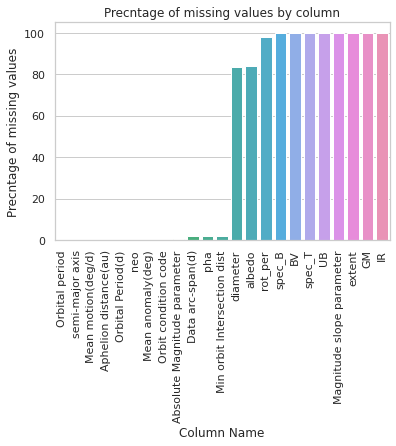

In [11]:
missing_values = readable_df.isnull().sum() / len(readable_df) * 100
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

missing_values = missing_values.to_frame()
missing_values.columns = ['Precntage of missing values']
missing_values.index.names = ['Column Name']
missing_values['Column Name'] = missing_values.index

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Column Name', y = 'Precntage of missing values', data=missing_values).set_title('Precntage of missing values by column')
plt.xticks(rotation = 90)
plt.show()

#### **Nasa API to Enrich the data**

We connected with NASA's API to enrich the data and fill some nulls
The script runs on each line that contains the name field and sends a GET request with the asteroid name in order to retrieve the updated data.
The script was written in a separate Python program and it ran for about two days

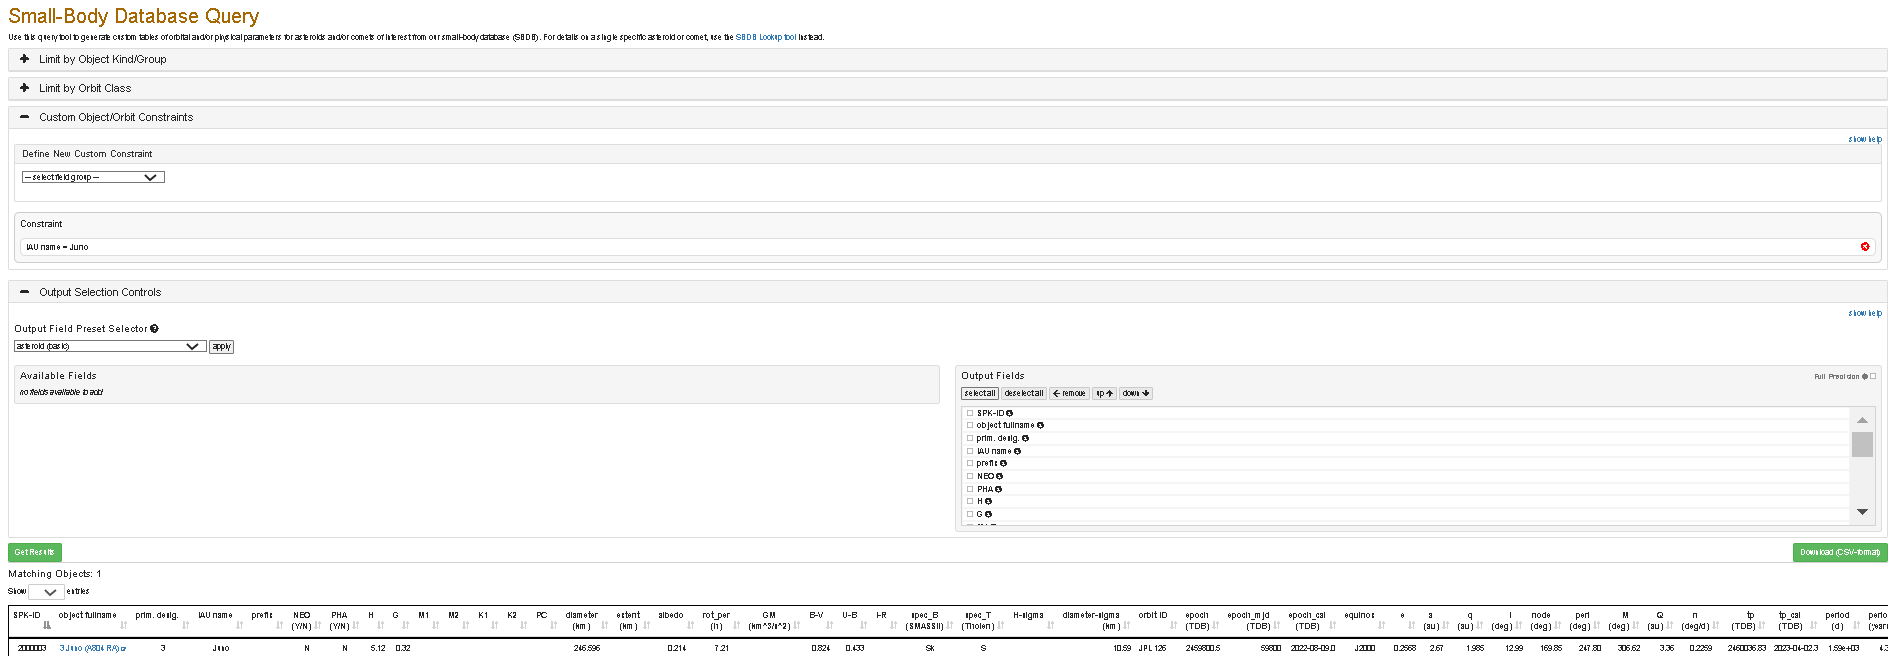

In [12]:
# TODO change that
if os.path.exists('Astroid_Enriched.csv'):
    enriched_df = pd.read_csv('Astroid_Enriched.csv',  on_bad_lines='skip')
elif os.path.exists('/content/drive/My Drive/Data/Astroid_Enriched.csv'):
    enriched_df = pd.read_csv('/content/drive/My Drive/Data/Astroid_Enriched.csv',  on_bad_lines='skip')
elif os.path.exists('/content/drive/MyDrive/Astroid_Enriched.csv'):
    enriched_df = pd.read_csv('/content/drive/MyDrive/Astroid_Enriched.csv',  on_bad_lines='skip')
else:
    raise Exception("Could not find the dataset")
    
readable_df = rename_colums(enriched_df)
readable_df = readable_df.drop(['name',"Unnamed: 0"], axis=1)

Text(0.5, 1.0, 'Count of null enriched from NASA API by column')

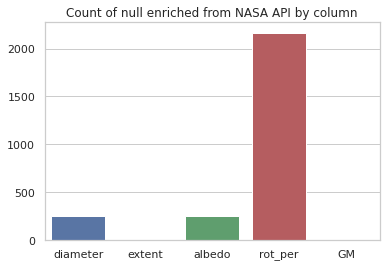

In [13]:
count_of_null_enriched = {'diameter': 247, 'extent': 2, 'albedo': 249, 'rot_per': 2164, 'GM': 1}
perc =  [i for i in count_of_null_enriched.values()]
sns.barplot(x=list(count_of_null_enriched.keys()),y=perc).set_title("Count of null enriched from NASA API by column")

#### **Data cleaning**

Now we will drop any row with null value in the diameter field

In [14]:
readable_df = readable_df.dropna(axis=0, subset=['diameter'])
readable_df.shape

(137884, 30)

In [15]:
def print_null_columns_sum(df):
    column_null_list = df.columns[df.isna().sum() > 0].tolist()
    print(df[column_null_list].isna().sum())
    
print_null_columns_sum(readable_df)

Data arc-span(d)                   138
Absolute Magnitude parameter       747
extent                          137865
albedo                            1228
rot_per                         124867
GM                              137869
BV                              136877
UB                              136918
IR                              137883
spec_B                          136492
spec_T                          136918
Magnitude slope parameter       137765
dtype: int64


There are still a lot of columns with missing values so we will drop them completely

In [16]:
cleaned_df = readable_df.drop(["Magnitude slope parameter", 'spec_T', 'spec_B', "IR", "UB",
                               "BV", "GM", "rot_per", "extent"], axis=1)
print_null_columns_sum(cleaned_df)

Data arc-span(d)                 138
Absolute Magnitude parameter     747
albedo                          1228
dtype: int64


In [17]:
print(f"shape before drop: {cleaned_df.shape}")
cleaned_df = cleaned_df.dropna()
print(f"shape after drop:  {cleaned_df.shape}")

shape before drop: (137884, 21)
shape after drop:  (136255, 21)


In [18]:
print_null_columns_sum(cleaned_df)

Series([], dtype: float64)


In [19]:
cleaned_df.dtypes

semi-major axis                    float64
Eccentricity                       float64
Inclination with ecliptic plane    float64
Longitude of the ascending node    float64
Argument of perihelion             float64
Perihelion distance(au)            float64
Aphelion distance(au)              float64
Orbital period                     float64
Data arc-span(d)                   float64
Orbit condition code                object
number of observations used          int64
Absolute Magnitude parameter       float64
neo                                 object
pha                                 object
diameter                            object
albedo                             float64
Min orbit Intersection dist        float64
class                               object
Mean motion(deg/d)                 float64
Orbital Period(d)                  float64
Mean anomaly(deg)                  float64
dtype: object

We also change some of the data types of other columns.

In [20]:
cleaned_df = cleaned_df.astype({'diameter': 'float64'})
cleaned_df.dtypes

semi-major axis                    float64
Eccentricity                       float64
Inclination with ecliptic plane    float64
Longitude of the ascending node    float64
Argument of perihelion             float64
Perihelion distance(au)            float64
Aphelion distance(au)              float64
Orbital period                     float64
Data arc-span(d)                   float64
Orbit condition code                object
number of observations used          int64
Absolute Magnitude parameter       float64
neo                                 object
pha                                 object
diameter                           float64
albedo                             float64
Min orbit Intersection dist        float64
class                               object
Mean motion(deg/d)                 float64
Orbital Period(d)                  float64
Mean anomaly(deg)                  float64
dtype: object

### Dealing with Categorical variables

In [21]:
def handle_categorical_data(df, categories_list=['neo', 'pha', 'class']):
    categorical_data = df.select_dtypes(include=['object']).copy()
    new_columns = pd.get_dummies(categorical_data, columns=categories_list, drop_first=True)
    df = df.drop(categories_list, axis = 1)
    model_df = pd.concat([df, new_columns], axis=1)
    return model_df

### Data visualizations 

Text(0.5, 1.0, 'Diameter values distubution')

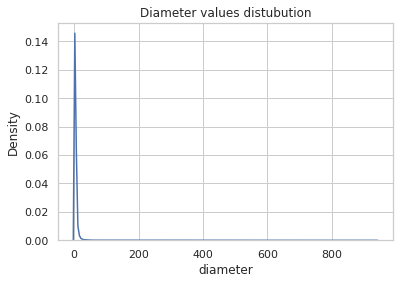

In [22]:
sns.kdeplot(cleaned_df['diameter']).set_title("Diameter values distubution")

#### Detecting and Removing Outliers

In [23]:
from scipy import stats

def handle_outliers(df):
  # Remove the categorical values and add them later
  cleaned_copy = df.copy()
  categirical_columns = cleaned_copy[['neo', 'pha', 'class', 'Orbit condition code']]
  cleaned_copy = cleaned_copy.drop(['neo', 'pha', 'class', 'Orbit condition code'], axis=1)

  regulars = cleaned_copy[(np.abs(stats.zscore(cleaned_copy)) < 3).all(axis=1)]
  outliers = len(cleaned_copy) - len(regulars)

  print("Number of outliers : " , outliers)
  cleaned_copy = pd.DataFrame(cleaned_copy[(np.abs(stats.zscore(cleaned_copy)) < 3).all(axis=1)])
  for col in categirical_columns.columns:
    cleaned_copy[col] = categirical_columns[col]
  return cleaned_copy

In [24]:
print(cleaned_df.shape)
cleaned_df = handle_outliers(cleaned_df)
print( cleaned_df.shape)

(136255, 21)
Number of outliers :  8067
(128188, 21)


Text(0.5, 1.0, 'Diameter values distubution')

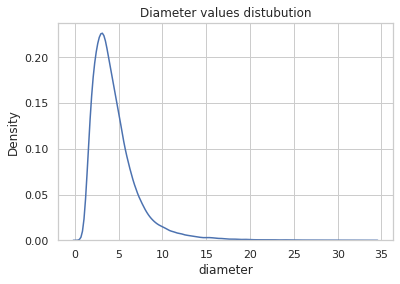

In [25]:
sns.kdeplot(cleaned_df['diameter']).set_title("Diameter values distubution")

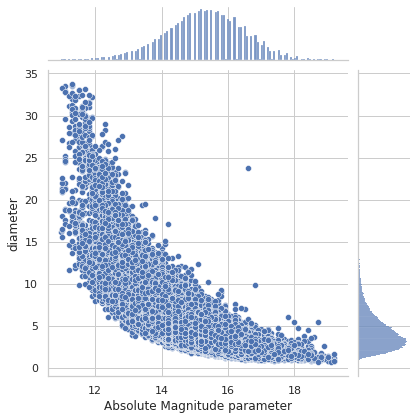

In [26]:
sns.jointplot(x='Absolute Magnitude parameter',y='diameter', kind='scatter', data=cleaned_df )

#### Correlation Between Features

In [27]:
def print_mini_correlation_matrix(df):
    df_opt = abs(df.corr(method='pearson')["diameter"]) > 0.2
    column_list = df.corr(method='pearson')["diameter"][df_opt]
    correlated_df = df[column_list.index]
    
    plt.figure(figsize=(20, 17))
    sns.heatmap(correlated_df.corr(method='pearson'),annot=True)
    plt.title("Correlation Between Features")
    plt.show()

# print_mini_correlation_matrix(cleaned_df)

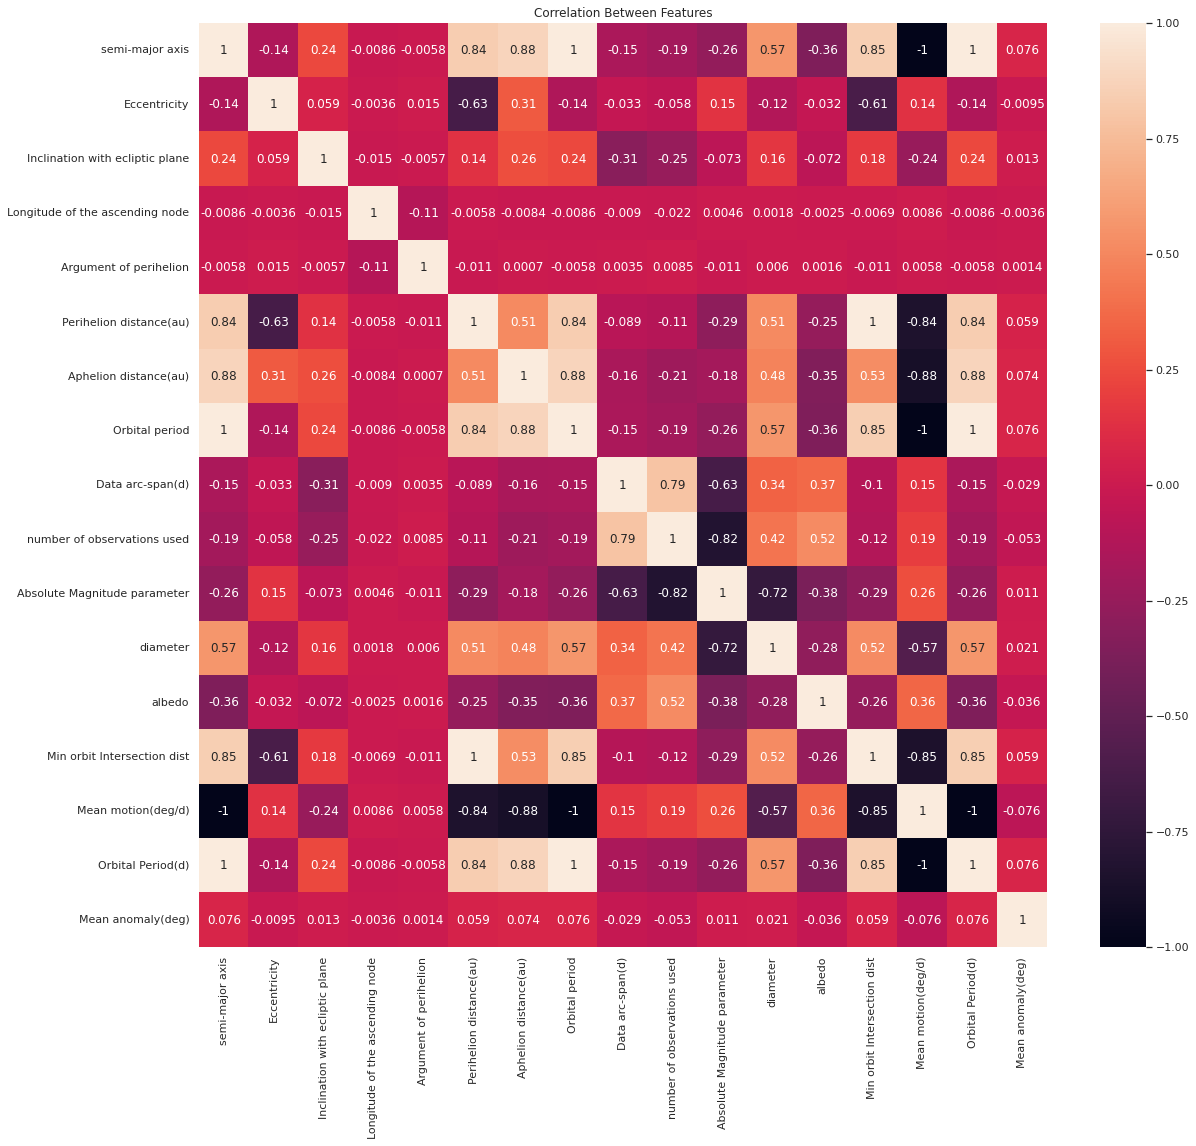

In [28]:
plt.figure(figsize=(19, 17))
sns.heatmap(cleaned_df.corr(method='spearman'),annot=True)
plt.title("Correlation Between Features")
plt.show()

In [30]:
from math import nan
def different_models(Classifiers, X_train, X_test, y_train, y_test):
    train_accuracy, test_accuracy = [], []
    max =0
    max_clf = nan
    for classifier in Classifiers.keys():
        clf = Classifiers[classifier]
        clf.fit(X_train, y_train)
        predict = clf.predict(X_test)
        score_train = clf.score(X_train, y_train)
        score_test = clf.score(X_test, y_test)
        train_accuracy.append(score_train)
        test_accuracy.append(score_test)
        if score_test>max:
          max = score_test
          max_clf = clf

    return train_accuracy, test_accuracy, max_clf

In [31]:
def print_models_performances(train_accuracy, test_accuracy, model_names):
    x_axis = np.arange(len(model_names))
    plt.bar(x_axis - 0.2, train_accuracy, width=0.4, label = 'train accuracy')
    plt.bar(x_axis + 0.2, test_accuracy, width=0.4, label = 'test accuracy')
    plt.xticks(x_axis, model_names)
    plt.legend()
    plt.show()

# 🧠 Machine learning models with removed nulls

In [32]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [33]:
X_train, X_test, y_train, y_test = prepare_data_to_model(cleaned_df)

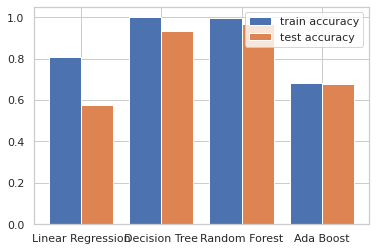

In [34]:
Classifiers = {"Linear Regression": LinearRegression(),
               "Decision Tree": DecisionTreeRegressor(),
               "Random Forest": RandomForestRegressor(),
               "Ada Boost": AdaBoostRegressor(),
             }

train_accuracy, test_accuracy, cl = different_models(Classifiers, X_train, X_test, y_train, y_test)
print_models_performances(train_accuracy, test_accuracy, model_names=Classifiers.keys())

# 🧠 Machine learning models with null filling

In [35]:
cleaned_df = readable_df.drop(["Magnitude slope parameter", 'spec_T', 'spec_B', "IR", "UB",
                               "BV", "GM", "rot_per", "extent"], axis=1)
cleaned_df = cleaned_df.astype({'diameter': 'float64'})
X_train, X_test, y_train, y_test = prepare_data_to_model(cleaned_df)


In [36]:
print_null_columns_sum(X_train)

Data arc-span(d)                100
Absolute Magnitude parameter    590
albedo                          971
dtype: int64


In [37]:
nan_cols_contiguous = ['Data arc-span(d)', 'Absolute Magnitude parameter', 'albedo']

## Predict missing values

In [38]:
def predict_missing_values(nan_cols, model_df_train, model_df_test):
  for arg in nan_cols:
    model_copy = model_df_train.copy()
    nan_cols_con_copy = nan_cols.copy()
    nan_cols_con_copy.remove(arg)
    model_copy = model_copy.drop(nan_cols_con_copy, axis=1)
    test_data = model_copy[model_copy[arg].isnull()]
    model_copy.dropna(inplace=True)

    y_train = model_copy[arg]
    X_train = model_copy.drop(arg, axis=1)
    X_test = test_data.drop(arg, axis=1)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_df_train.loc[model_df_train[arg].isnull(), arg] = y_pred

    test_data = model_df_test[model_df_test[arg].isnull()]
    dropped = test_data.drop(nan_cols, axis=1)
    y_pred_test = model.predict(dropped)
    model_df_test.loc[model_df_test[arg].isnull(), arg] = y_pred_test
  return model_df_train, model_df_test

In [39]:
X_train_predict = X_train.copy()
X_test_predict = X_test.copy()

In [40]:
X_train, X_test = predict_missing_values(nan_cols_contiguous, X_train_predict, X_test_predict)

In [41]:
print_null_columns_sum(X_train)

Series([], dtype: float64)


### Basic Regression Models

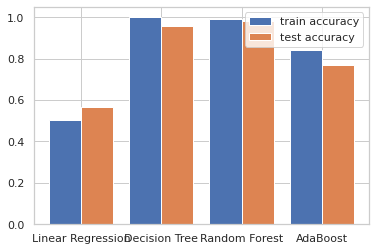

In [42]:
Classifiers = {"Linear Regression": LinearRegression(),
               "Decision Tree": DecisionTreeRegressor(),
               "Random Forest": RandomForestRegressor(),
               "AdaBoost": AdaBoostRegressor(),
             }

train_accuracy, test_accuracy, clf = different_models(Classifiers, X_train, X_test, y_train, y_test)
print_models_performances(train_accuracy, test_accuracy, model_names=Classifiers.keys())

## Fill null values with the mean

In [43]:
def fill_na_with_mean(nan_cols, dtf_train, dtf_test):
  for arg in nan_cols:
    dtf_train[arg] = dtf_train[arg].fillna(dtf_train[arg].mean())
    dtf_test[arg] = dtf_test[arg].fillna(dtf_train[arg].mean())

In [44]:
X_train_mean = X_train.copy()
X_test_mean = X_test.copy()

In [45]:
fill_na_with_mean(nan_cols_contiguous, X_train_mean, X_test_mean)

In [46]:
print_null_columns_sum(X_train_mean)

Series([], dtype: float64)


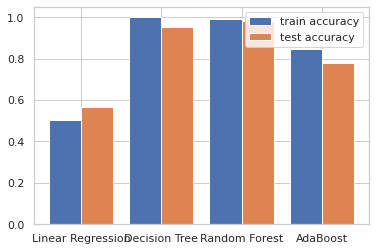

In [47]:
Classifiers = {"Linear Regression": LinearRegression(),
               "Decision Tree": DecisionTreeRegressor(),
               "Random Forest": RandomForestRegressor(),
               "AdaBoost": AdaBoostRegressor(),
             }

train_accuracy, test_accuracy, clf_ = different_models(Classifiers, X_train, X_test, y_train, y_test)
print_models_performances(train_accuracy, test_accuracy, model_names=Classifiers.keys())

# 💡Model Conclusion

<center>
Model Accuracy table:
<table>
  <tr>
    <th/>
    <th>Removing nulls</th>
    <th>Filling nulls with predictor model</th>
    <th>Filling nulls with mean </th>
  </tr>
  <tr>
    <td>Linear Regression</td>
    <td>85%</td>
    <td>56%</td>
    <td>56%</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>91%</td>
    <td>95%</td>
    <td>95%</td>

  </tr>
    <tr>
    <td>Random Forest</td>
    <td>95%</td>
    <td>98%</td>
    <td>98%</td>
  </tr>
    <tr>
    <td>Ada Boost</td>
    <td>80%</td>
    <td>74%</td>
    <td>78%</td>

  </tr>
</table>
</center>



In conclusion, Random Forest model  performs well when we filled Nulls (no matter how).

So we can conclude based on the above analysis as Random forest will be the best fit for estimating the asteroid diameter.

# 🔍 Model Analysis

In [53]:
# !pip install shap
import shap


In [50]:
background_data = shap.maskers.Independent(X_train, max_samples=100)
explainer = shap.Explainer(clf.predict, background_data)

In [51]:
shap_values_100 = explainer(X_train[600:1000])

Permutation explainer: 401it [09:04,  1.37s/it]


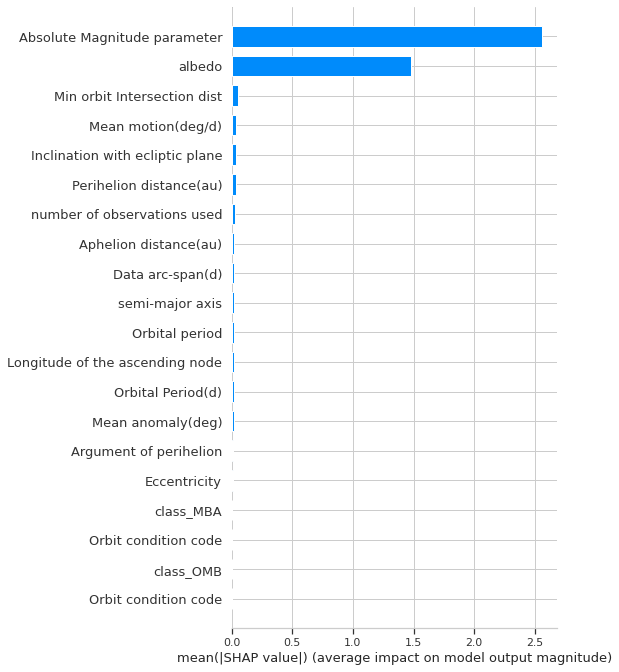

In [52]:
shap.summary_plot(shap_values_100, X_train, plot_type="bar")

**Future work:**
* Predict diameter without "Absolute Magnitude parameter" feature
* Data cleaning and manipulation
* Feature selection
* Hyperparameter tuning
* Split also to a validation set
